# **HOSPITAL BEDS MANAGEMENT**

#**Import Library**

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Business Understanding**

**Business Objective**

  Rumah Sakit ini ingin tahu bagaimana cara mengatur staf, tempat tidur dan lyanannya agar sesuai dengan jumlah pasien.

  Tujuannya supaya pelayanan lebih lancar, tidak ada kekurangan satf atau tempat tidur, pasien bisa ditanganin secara baik dan membantu rumah sakit mengelola sumber daya dengan lebih baik.

  Dengan tercapainya tujuan tersebut, rumah sakit diharapkan dapat memberikan pelayanan yang lebih efisien, cepat, dan berkualitas kepada pasien.


**Assess Situation**



Rumah sakit sebagai instuasi pelayanan kesehatan menghadapi tantangan dalam mengelola sumber daya secara optimal, terutama tenaga medis dan fasilitas tempat tidur. permintaan pasien yang tidak stabil dapat menyebabkan ketidak seimbangan antara kapasitas layanan dan kebutuhan pasien, sehingga berdampak pada kualitas pelayanan dan efisiensi oprasional.


Dataset rumah sakit sintetis ini disediakan untuk mensimulasikan kondisi operasional sumah sakit berukuran sedang, sehingga dapat digunaan sebagai bahan anlisis tanpa menggunakan data pasien nyata(untuk menjaga privasi).

adapun masalah yang dihadapi:
*   tenaga kerja yang tidak merata antar unit layanan.
*   kelebihan atau kekurangan kapasitas tempat tidur pada unit tertentu.
*   lonjakan penerimaan pasien yang tidak diantisipasi dengan baik





**Analytic Goals**

Jadi tujuan yang ingin dicapai dari sisi analisis data(bukan tujuan bisnis, tapi tujuan teknis datanya)

*  Menghitung rasio
  pasien dibandikan staf dan Tempat tidur

*  Menganalisis Pola pasien
  mengetahui  jumlah pasien,karakteristik pasien, dan pola kunjungan

*  Menganalisis penggunaan tempat tidur
  mengetahui unit mana yang sering penuh dan mana yang jarang digunkan

*  Menganalisis distribusi tenaga kerja
  melihat apakah jumlah staf sudah seimbang dengan jumlah pasien, Membuat Perkiraan staf jika jumlah pasien meningkat

*   Mencari pola dan insight penting
  misalnya waktu ramai pasien, unit dengan beban tinggi, dan potensi masalah layanan.





**Project Plan**

Project plan menjelaskan tahapan yang akan dilakukan dalam analisis data.

*   Langkah 1: Pahami Data

    Melihatihat isi dataset, jumlah baris/kolom, dan tipe data.
*   Langkah 2: Siapkan Data

    Bersihkan data dari nilai KOsonh/duplikat,Ubah data Kategorialkan jadi angka jika perlu

*   Langkah 3: Analisis dan Modeling

    Hitung rasio pasien/staf, Pasien/Tempat Tidur, buat grafik, dan coba model prediksi sederhana.

*   Langkah 4: Evaluasi

    Melihat hasil analisis, tentukan dapartemen yang paling sibuk, dan buat rekomendasi









#**DATA UNDERSTANDING**

##**Memuat Dataset**

In [37]:
path = "/content/drive/MyDrive/AVD/patients.csv"
df = pd.read_csv(path)
df

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76
...,...,...,...,...,...,...,...
995,PAT-a01bf534,Amber Vang,26,2025-12-02,2025-12-04,emergency,91
996,PAT-87fa07bd,Martha Smith,89,2025-11-18,2025-11-30,emergency,99
997,PAT-8f07e894,Jennifer James,72,2025-12-12,2025-12-21,ICU,69
998,PAT-4ae301e1,Kara Hernandez,47,2025-02-08,2025-02-20,ICU,61


#**Deskripsi Data**

##**Informasi Data**

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


Berdasarkan data diatas dataset ini memiliki 1000 baris dan 7 kolom

##**Informasi Lanjutan**

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


1. Patient_id: Jumlah baris: 1000 Tipe data: Object
2. Name: Jumlah baris: 1000 Tipe data: Object
3. age: Jumlah baris: 1000 Tipe data: Intj64
4. Arrival_date: Jumlah baris: 1000 Tipe data: Object
5. Daparture_date: Jumlah baris: 1000 Tipe data: Object
6. Service: Jumlah baris: 1000 Tipe data: Object
7. Statisfaction: Jumlah baris: 1000 Tipe data: Int64



##**Informasi Statistik Deskriftif**

In [91]:
df.describe(include="all")

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
count,1000,1000,1000.000000,1000,1000,1000,1000.000000
unique,1000,993,NaN,344,337,4,NaN
top,PAT-e2ef9c5f,Michael Miller,NaN,2025-01-19,2025-10-16,emergency,NaN
freq,1,2,NaN,9,8,263,NaN
mean,NaN,NaN,45.337000,NaN,NaN,NaN,79.597000
std,NaN,NaN,25.999912,NaN,NaN,NaN,11.550325
min,NaN,NaN,0.000000,NaN,NaN,NaN,60.000000
25%,NaN,NaN,23.000000,NaN,NaN,NaN,70.000000
50%,NaN,NaN,46.000000,NaN,NaN,NaN,80.000000
75%,NaN,NaN,68.000000,NaN,NaN,NaN,89.250000


1. Count berdasarkan data, total baris ada 1000.
*   Profit Lengkap Tidak ada data yang hilang
*   Tidak Terdapat MIssing Velues terhadap kolom, Patient_id, Name, Age, Arrival_date, Departure_date, Service, Satisfaction.



---

2. Mean vs Median

*   Kolom age
    Mean = 45.337
    Median =46.000
  Nilai median hampir sama dengan mean menunjukan distribusi umur relatif seimbang.

*   Kolom satisfaction
    Mean = 79.597
    Median =80.000
  Rata rata tingkat kepuasan pasien menunjukan tergolong tinggi. hal ini mengindikasikan kualitascpelayanan rumah sakit dalam dataset tergolong baik.

Kesimpulannya: Dataset ini menunjukan bahwa pasien berasal dari berbagai usia, dengan dominan usia dewasa, tingkat kepuasan pasien relatif tinggi dan stabil, rumah sakit secara umum memiliki performa pelayanan yang baik menurut sintetis ini.




---


3. min dan max

*   Age
    min = 0
    max = 89.000
*   Satisfaction
    min = 60.000
    max = 99.000

Kesimpulannya:


*   Rentang usia pasien sangat luas (0–89 tahun), menunjukkan rumah sakit melayani semua kelompok usia.

*   Tingkat kepuasan pasien berada pada rentang yang baik (60–99), yang menandakan kualitas layanan rumah sakit tergolong baik.




4. Standar Deviasi(std)
    

*   Age
    Mean = 45.337
    Std = 25.999


*   Statisfasion
    Mean = 79.597
    Std = 11.550

Kesimpulan:
*   Variasi usia Pasien tinggi, Rumah sakit melayani banyak kelompok usia.
*   Variasi kepuasan pasien rendah, Pelayanan rumah sakit dinilai cukup
konsisten oleh pasien.















## **VERIFIKASI KUALITAS DATA**

### **Data Type Check**

Pemeriksaan tipe data dilakukan untuk memastikan setiap kolom memiliki tipe data yang sesuai dengan maknanya, sehingga data dapat dianalisis dengan benar.



In [92]:
df.dtypes

,0
patient_id,object
name,object
age,int64
arrival_date,object
departure_date,object
service,object
satisfaction,int64


### **Incosistent Values**

Inconsistent values adalah perbedaan penulisan data kategori yang seharusnya sama.

1. **Name**

pada kolom ini terdapat potensi nilai tidak konsisten karena perbedaan format penulisan nama (huruf kapital dan spasi). Namun, perbedaan ini tidak mempengaruhi analisis numerik, tetapi dapat mempengaruhi analisis berbasis identitas individu.

In [42]:
print(df['name'].unique())

['Richard Rodriguez' 'Shannon Walker' 'Julia Torres' 'Crystal Johnson'
 'Garrett Lin' 'Diana May' 'William Herrera' 'Ashley Waller'
 'Victor Baker' 'Jeffrey Chandler' 'Larry Dixon' 'Kenneth Scott'
 'April Frost' 'Michelle Harmon' 'Helen Jones' 'Erin Edwards'
 'Michelle Evans' 'Jason Powell' 'Cameron Fisher' 'Megan Orr'
 'Elizabeth Kelley' 'Dustin Jordan' 'Mary Marshall' 'Daniel Kennedy'
 'Rebecca Jackson' 'Jose Schultz' 'Robert Potter' 'Courtney Gonzalez'
 'David Alvarez' 'Angel Perry' 'Cheyenne Horton' 'David Douglas Jr.'
 'Patricia Rodriguez' 'Christopher Rubio' 'Amber Wright' 'Joyce Solis'
 'Victoria Larson' 'Stephanie Salazar' 'Kathy Rivas' 'Stephanie Manning'
 'David Wright' 'Pamela Boyd' 'Denise Jones' 'Devon Flores' 'Brenda Hall'
 'Michelle Brown' 'Joshua Perry' 'Jason Stein' 'Melissa Gates'
 'Jamie Smith' 'Paul Castaneda' 'Jennifer Adkins' 'Lindsey Walker'
 'Jeffrey Johnson' 'Michael Powell' 'John Anderson' 'Alyssa Long'
 'Alyssa Day' 'Joel Williams' 'Daniel Murphy' 'Jamie Walt

2. **arrival_date**

Pada kolom ini ditemukan variasi format tanggal yang berbeda. Perbedaan format ini dapat menyebabkan kesalahan dalam analisis waktu, sehingga perlu dilakukan standarisasi format tanggal (misalnya YYYY-MM-DD).

In [43]:
print(df['arrival_date'].unique())

['2025-03-16' '2025-12-13' '2025-06-29' '2025-10-12' '2025-02-18'
 '2025-06-26' '2025-12-26' '2025-05-21' '2025-07-30' '2025-11-01'
 '2025-01-19' '2025-06-24' '2025-11-15' '2025-02-24' '2025-06-11'
 '2025-10-15' '2025-11-09' '2025-09-12' '2025-08-27' '2025-04-02'
 '2025-03-29' '2025-06-14' '2025-11-07' '2025-06-10' '2025-02-05'
 '2025-10-30' '2025-07-14' '2025-10-20' '2025-02-22' '2025-10-07'
 '2025-02-28' '2025-04-25' '2025-08-25' '2025-10-05' '2025-01-29'
 '2025-12-22' '2025-04-27' '2025-09-25' '2025-07-09' '2025-07-12'
 '2025-05-29' '2025-06-13' '2025-10-16' '2025-08-15' '2025-12-31'
 '2025-03-14' '2025-08-05' '2025-02-08' '2025-04-12' '2025-02-13'
 '2025-08-04' '2025-08-03' '2025-01-25' '2025-09-23' '2025-03-27'
 '2025-11-11' '2025-04-13' '2025-04-18' '2025-06-20' '2025-12-30'
 '2025-07-29' '2025-09-04' '2025-04-06' '2025-08-24' '2025-12-25'
 '2025-11-20' '2025-07-06' '2025-07-17' '2025-11-29' '2025-09-17'
 '2025-03-04' '2025-08-29' '2025-09-18' '2025-04-09' '2025-03-03'
 '2025-03-

3. **Daparture_date**

Terdapat potensi nilai tidak konsisten akibat perbedaan format tanggal dan kemungkinan kesalahan logika waktu, seperti tanggal keluar lebih awal dari tanggal masuk. Data tersebut perlu diperbaiki atau dihapus karena dapat menyebabkan kesalahan perhitungan lama tinggal pasien

In [44]:
print(df['departure_date'].unique())

['2025-03-22' '2025-12-14' '2025-07-05' '2025-10-23' '2025-02-25'
 '2025-06-30' '2025-12-27' '2025-06-04' '2025-08-13' '2025-11-14'
 '2025-01-21' '2025-06-26' '2025-11-19' '2025-03-03' '2025-06-23'
 '2025-10-17' '2025-11-16' '2025-09-25' '2025-09-01' '2025-04-10'
 '2025-04-12' '2025-06-20' '2025-11-09' '2025-06-17' '2025-02-18'
 '2025-11-04' '2025-07-21' '2025-10-26' '2025-03-06' '2025-10-08'
 '2025-03-14' '2025-04-26' '2025-09-03' '2025-10-16' '2025-02-11'
 '2025-12-31' '2025-05-07' '2025-11-15' '2025-07-19' '2025-07-15'
 '2025-06-09' '2025-06-14' '2025-03-04' '2025-08-19' '2026-01-11'
 '2025-03-23' '2025-08-18' '2025-04-14' '2025-02-24' '2025-11-08'
 '2025-08-07' '2025-08-08' '2025-01-27' '2025-03-10' '2025-09-30'
 '2025-04-06' '2025-05-04' '2025-11-18' '2025-04-30' '2025-06-28'
 '2026-01-06' '2025-07-30' '2025-11-10' '2025-09-17' '2025-04-09'
 '2025-02-12' '2025-09-02' '2025-09-05' '2025-12-29' '2025-06-29'
 '2025-11-22' '2025-07-17' '2025-07-16' '2025-07-24' '2025-12-01'
 '2025-09-

4. **Service**

Kolom Service biasanya kategori layanan, inconsistency terjadi karena
Penulisan berbeda, Singkatan, dan Typo.

In [45]:
print(df['service'].unique())

['surgery' 'general_medicine' 'emergency' 'ICU']


### **Missing Values**

Missing values adalah data yang kosong atau tidak terisi (NULL/NaN).
Pada tahap ini bisa melihat berapa banyak daya yang kosong.

In [89]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['non-null'])

,non-null
patient_id,0.0
name,0.0
age,0.0
arrival_date,0.0
departure_date,0.0
service,0.0
satisfaction,0.0


### **Duplicated Values**

Duplicate values adalah baris data yang sama persis muncul lebih dari satu kali. hal ini dilakukan Dataset bebas dari redundansi data sehingga analisis tidak bias.

In [90]:
df[df.duplicated()]

,patient_id,name,age,arrival_date,departure_date,service,satisfaction


Pada data ini, Setiap Patient_ID bersifat unik. Tidak ditemukan baris data yang identik secara keseluruhan.

### **Outliers Values**

nilai yang jauh berbeda dari sebagian besar data dan dapat mempengaruhi hasil analisis.
* Kolom Age

Ditemukan usia sangat rendah (0 tahun) dan sangat tinggi (hingga 89 tahun).
Nilai ini masih logis karena mencerminkan pasien bayi dan lansia.

* Kolom Length_of_Stay

Terdapat pasien dengan lama rawat inap jauh lebih lama dibanding pasien lain.
Hal ini bisa terjadi pada pasien dengan penyakit kronis atau komplikasi serius.

* Kolom Satisfaction
Nilai kepuasan berada pada rentang normal (60–99), sehingga tidak ditemukan outlier ekstrem.

In [48]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
age,0.0
satisfaction,0.0


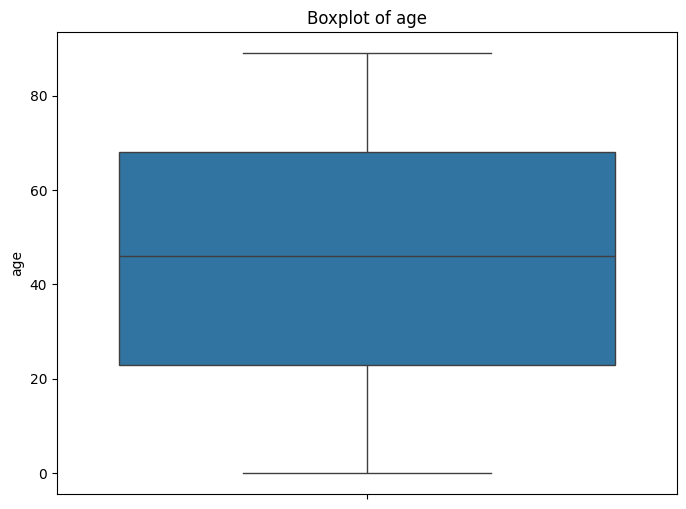

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['age'])
plt.title('Boxplot of age')
plt.ylabel('age')
plt.show()

#**Eksplorassi Data (EDA)**

#**Comparison(Perbandingan)**

Comparison digunakan untuk membandingkan dua atau lebih kategori atau kelompok data.

Tujuannya: Mengetahui kategori mana yang paling dominan, Membandingkan performa atau jumlah antar kelompok

Contoh visuanya, Bar Chart:
* rata-rata length_of_stay per dapartemen
* rata-rata statisfaction per gender

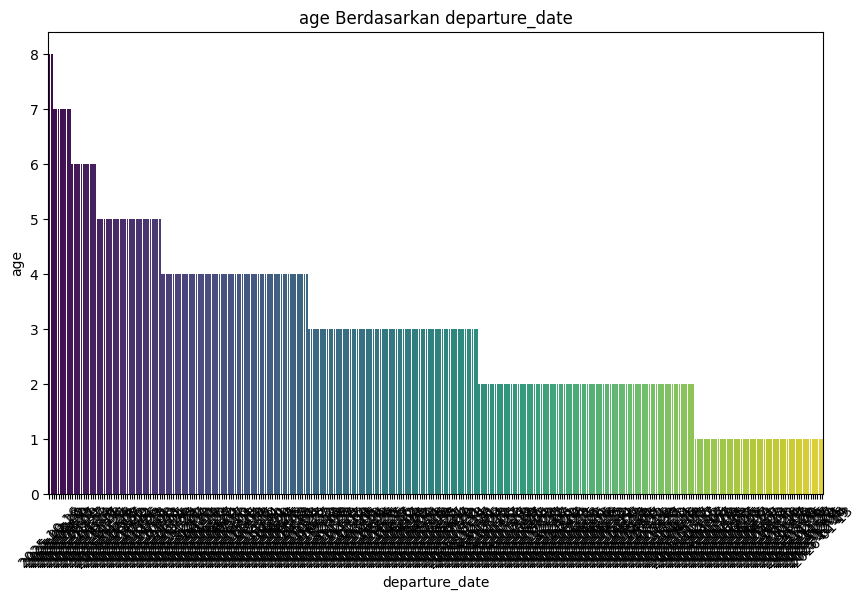

In [81]:
age_departure_date = df.groupby('departure_date')['age'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=age_departure_date.index, y=age_departure_date.values, palette='viridis', hue=age_departure_date.index, legend=False)
plt.title('age Berdasarkan departure_date')
plt.xlabel('departure_date')
plt.ylabel('age')
plt.xticks(rotation=45)
plt.show()

#**Composition(Komposisi)**

Composition adalah analisis untuk melihat proporsi atau persentase bagian dalam satu keseluruhan.
Biasanya menggunakan pie chart atau stacked bar chart.  Tujuannya yaitu:
* Mengetahui kontribusi tiap kategori terhadap total data
* Melihat struktur data secara keseluruhan.

Visualnya yaitu Pie Chart atau Bar Chart:
* Persentase Gender
* Persentase Admission_Type
* Persentase Department

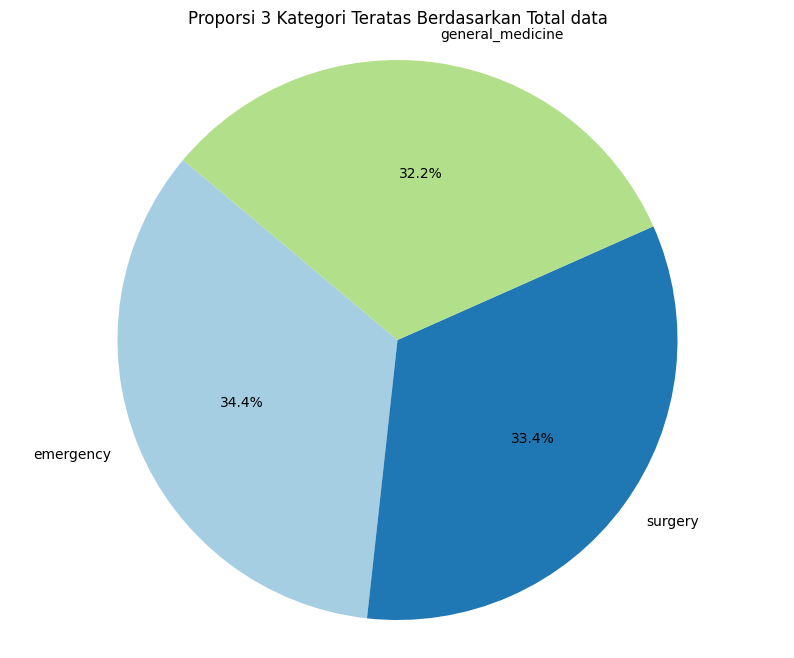

In [83]:
sales_by_service = df.groupby('service')['age'].sum().sort_values(ascending=False)
sales_by_service_top3 = sales_by_service.head(3)

plt.figure(figsize=(10, 8))
sales_by_service_top3.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporsi 3 Kategori Teratas Berdasarkan Total data')
plt.ylabel('')
plt.axis('equal')
plt.show()

#**Distribution(Distribusi)**

Distribution adalah analisis untuk melihat sebaran nilai numerik.
Biasanya menggunakan histogram atau boxplot.

Tujuannya:
* Mengetahui pola data (normal, miring, dll)
* Melihat nilai ekstrem (outliers)
* Mengetahui rentang dan sebaran data

contoh visualnya
Histogram atau Boxplot:
* Distribusi Age
* Distribusi Length_of_Stay
* Distribusi Satisfaction

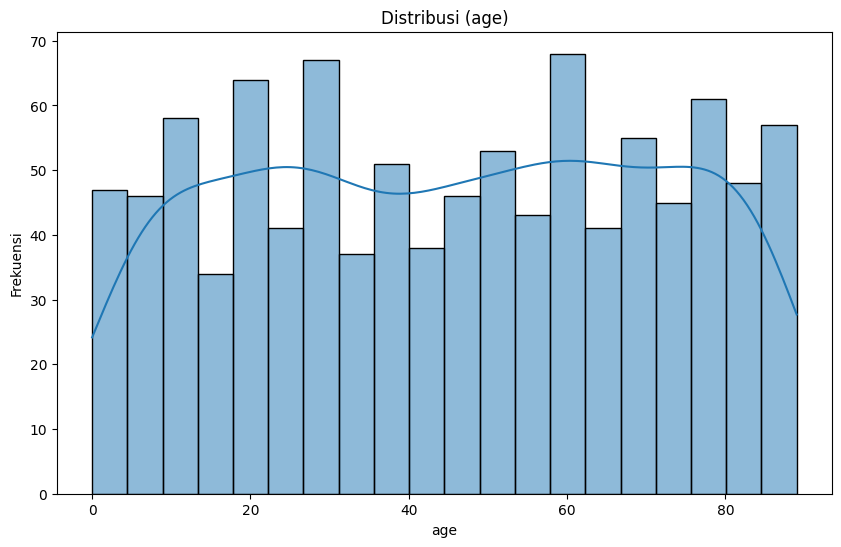

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribusi (age)')
plt.xlabel('age')
plt.ylabel('Frekuensi')
plt.show()

#**Relationship(Hubungan)**

analisis untuk melihat hubungan antara dua atau lebih variabel.
Biasanya menggunakan scatter plot atau correlation heatmap.
Tujuan:
* Mengetahui variabel yang saling mempengaruhi
* Mencari pola atau korelasi dalam data
Visualnya:
Scatter Plot atau Heatmap Korelasi:
* Age vs Length_of_Stay
* Length_of_Stay vs Satisfaction

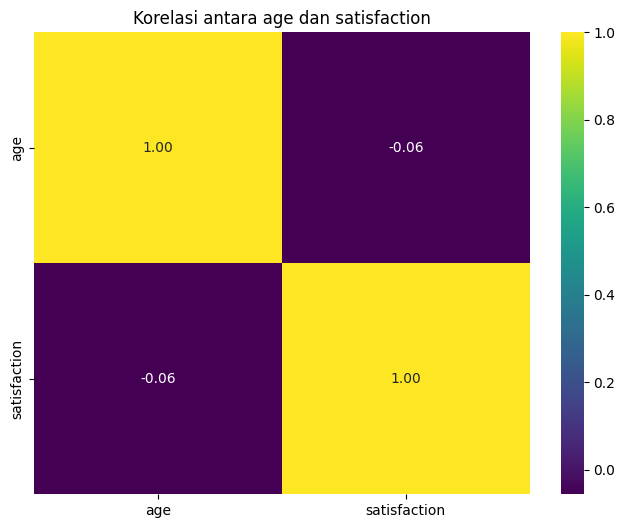

In [87]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['age', 'satisfaction']].corr(),
            annot=True,
            cmap='viridis',
            fmt='.2f')
plt.title('Korelasi antara age dan satisfaction')
plt.show()

#**Menyimpan Dataset**

In [88]:
df.to_csv('/content/drive/MyDrive/AVD/patients.csv', index=False)